<a href="https://colab.research.google.com/github/i-ganza007/-Time-Series-Forecasting/blob/main/_TimeSeries1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [4]:
train.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [5]:
test.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv
0,30677,1.190496,0.701029,-2.186052,-0.003982,-0.069353,-0.137667,2013-07-02 04:00:00,1.448138,-0.732019,-0.522096
1,30678,1.121211,0.619051,-2.186052,0.031811,-0.069353,-0.137667,2013-07-02 05:00:00,1.448138,-0.732019,-0.522096
2,30679,1.190496,0.783006,-2.186052,0.094398,-0.069353,-0.137667,2013-07-02 06:00:00,1.448138,-0.732019,-0.522096
3,30680,1.190496,0.946961,-2.088668,0.174782,-0.069353,-0.137667,2013-07-02 07:00:00,1.448138,-0.732019,-0.522096
4,30681,1.190496,1.192893,-1.991283,0.210575,-0.069353,-0.137667,2013-07-02 08:00:00,1.448138,-0.732019,-0.522096


In [6]:
train.describe()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
count,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,28755.000000
mean,15338.500000,-0.029431,-0.062712,0.013612,0.030542,0.016992,0.011253,0.016193,0.005833,-0.025008,100.793427
std,8855.542765,0.994087,1.015193,1.008991,1.018337,1.087278,1.063811,1.006001,1.001847,0.982122,93.144433
min,1.000000,-2.135153,-2.578070,-2.380821,-0.468688,-0.069353,-0.137667,-0.690542,-0.732019,-0.522096,0.000000
25%,7669.750000,-0.888034,-0.938521,-0.822670,-0.441894,-0.069353,-0.137667,-0.690542,-0.732019,-0.522096,29.000000
50%,15338.500000,-0.056622,0.045209,-0.043595,-0.352512,-0.069353,-0.137667,-0.690542,-0.732019,-0.522096,75.000000
75%,23007.250000,0.913358,0.864984,0.832865,0.005216,-0.069353,-0.137667,1.448138,1.366085,-0.522096,142.000000
max,30676.000000,1.814055,2.340578,2.877939,11.231956,35.439859,25.288745,1.448138,1.366085,1.915355,994.000000


In [7]:
train.isna().sum()

,0
No,0
DEWP,0
TEMP,0
PRES,0
Iws,0
Is,0
Ir,0
datetime,0
cbwd_NW,0
cbwd_SE,0


In [8]:
test.isna().sum()

,0
No,0
DEWP,0
TEMP,0
PRES,0
Iws,0
Is,0
Ir,0
datetime,0
cbwd_NW,0
cbwd_SE,0


In [9]:
train.columns.isin(['pm2.5'])

array([False, False, False, False, False, False, False, False, False,
       False, False,  True])

In [10]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)

In [11]:
train.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
datetime,,,,,,,,,,,
2010-01-01 00:00:00,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 01:00:00,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 02:00:00,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 03:00:00,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 04:00:00,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN


In [12]:
test.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
datetime,,,,,,,,,,
2013-07-02 04:00:00,30677,1.190496,0.701029,-2.186052,-0.003982,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2013-07-02 05:00:00,30678,1.121211,0.619051,-2.186052,0.031811,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2013-07-02 06:00:00,30679,1.190496,0.783006,-2.186052,0.094398,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2013-07-02 07:00:00,30680,1.190496,0.946961,-2.088668,0.174782,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2013-07-02 08:00:00,30681,1.190496,1.192893,-1.991283,0.210575,-0.069353,-0.137667,1.448138,-0.732019,-0.522096


In [13]:
train.fillna(train.mean(), inplace=True)


In [14]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']


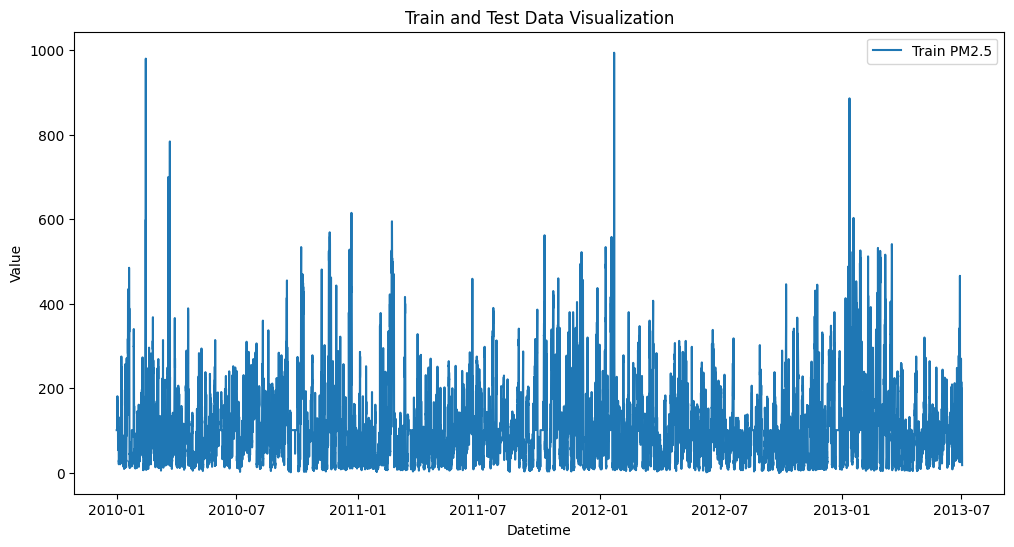

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['pm2.5'], label='Train PM2.5')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Train and Test Data Visualization')
plt.legend()
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_scaled = scaler.fit_transform(X_train)
standard_scaled = pd.DataFrame(standard_scaled, columns=X_train.columns, index=X_train.index)
standard_scaled

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
datetime,,,,,,,,,
2010-01-01 00:00:00,-1.560701,-1.831739,0.425893,-0.463936,-0.079415,-0.139990,1.423426,-0.736504,-0.506146
2010-01-01 01:00:00,-1.560701,-1.912491,0.329375,-0.402474,-0.079415,-0.139990,1.423426,-0.736504,-0.506146
2010-01-01 02:00:00,-1.560701,-1.831739,0.232857,-0.367326,-0.079415,-0.139990,1.423426,-0.736504,-0.506146
2010-01-01 03:00:00,-1.560701,-2.073995,0.232857,-0.305864,-0.079415,-0.139990,1.423426,-0.736504,-0.506146
2010-01-01 04:00:00,-1.491003,-1.912491,0.136339,-0.244403,-0.079415,-0.139990,1.423426,-0.736504,-0.506146
...,...,...,...,...,...,...,...,...,...
2013-07-01 23:00:00,1.505994,0.994579,-2.083580,-0.437623,-0.079415,2.515748,-0.702530,-0.736504,-0.506146
2013-07-02 00:00:00,1.366599,0.913827,-2.180099,-0.402474,-0.079415,3.179683,1.423426,-0.736504,-0.506146
2013-07-02 01:00:00,1.296901,0.752323,-2.083580,-0.288388,-0.079415,3.843617,1.423426,-0.736504,-0.506146


In [17]:
y_train_scaled = scaler.fit_transform(train['pm2.5'].values.reshape(-1,1))
y_train_df = pd.DataFrame(y_train_scaled, columns=['pm2.5'], index=train.index)
y_train_scaled

array([[-1.57584510e-16],
       [-1.57584510e-16],
       [-1.57584510e-16],
       ...,
       [-7.62851969e-01],
       [-9.07009281e-01],
       [-9.18098305e-01]])

In [18]:
standard_scaled.shape

(30676, 9)

In [30]:
standard_scaled.head()

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
datetime,,,,,,,,,
2010-01-01 00:00:00,-1.560701,-1.831739,0.425893,-0.463936,-0.079415,-0.13999,1.423426,-0.736504,-0.506146
2010-01-01 01:00:00,-1.560701,-1.912491,0.329375,-0.402474,-0.079415,-0.13999,1.423426,-0.736504,-0.506146
2010-01-01 02:00:00,-1.560701,-1.831739,0.232857,-0.367326,-0.079415,-0.13999,1.423426,-0.736504,-0.506146
2010-01-01 03:00:00,-1.560701,-2.073995,0.232857,-0.305864,-0.079415,-0.13999,1.423426,-0.736504,-0.506146
2010-01-01 04:00:00,-1.491003,-1.912491,0.136339,-0.244403,-0.079415,-0.13999,1.423426,-0.736504,-0.506146


In [19]:
window = 5
features = standard_scaled.shape[1]
samples = standard_scaled.shape[0] - window

In [31]:
def create_sequences(data_features, data_target, window_size):
    X, y = [], []
    for i in range(len(data_features) - window_size):
        X.append(data_features.iloc[i:(i + window_size)].values)
        y.append(data_target.iloc[i + window_size, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(standard_scaled, y_train_df, window)
X[:8]

array([[[-1.56070054, -1.83173882,  0.42589344, -0.46393574,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-1.56070054, -1.91249075,  0.32937521, -0.40247436,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-1.56070054, -1.83173882,  0.23285698, -0.36732551,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-1.56070054, -2.0739946 ,  0.23285698, -0.30586413,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-1.49100293, -1.91249075,  0.13633876, -0.24440275,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569]],

       [[-1.56070054, -1.91249075,  0.32937521, -0.40247436,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-1.56070054, -1.83173882,  0.23285698, -0.36732551,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
      

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
x_train.shape

(21469, 5, 9)

In [36]:
x_test[0:3]

array([[[-0.4455389 , -1.18572341,  0.42589344, -0.46393574,
         -0.07941539, -0.13998984, -0.70253033, -0.73650367,
         -0.50614569],
        [-0.4455389 , -1.18572341,  0.42589344, -0.4376232 ,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-0.4455389 , -1.10497149,  0.52241166, -0.40247436,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-0.4455389 , -0.94346764,  0.52241166, -0.36732551,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-0.4455389 , -0.86271571,  0.42589344, -0.33217667,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569]],

       [[-0.93342212, -0.29745223,  0.81196634, -0.4287869 ,
         -0.07941539, -0.13998984, -0.70253033,  1.35776649,
         -0.50614569],
        [-0.93342212, -0.2167003 ,  0.61892989, -0.39363805,
         -0.07941539, -0.13998984, -0.70253033,  1.35776649,
      

In [38]:
# from sklearn.metrics import root_mean_squared_error

# # Calculate RMSE on the unscaled training validation set predictions
# rmse_unscaled = root_mean_squared_error(y_test_unscaled, y_pred_unscaled)

# print(f"RMSE on unscaled training validation data: {rmse_unscaled}")

In [22]:
window_size = 5
features = standard_scaled.shape[1]
samples = x_train.shape[0] - window_size

In [40]:
models = Sequential([
    tf.keras.layers.LSTM(50,activation='relu',input_shape=(window_size,features), return_sequences=False),
    tf.keras.layers.Dense(1)
])
models.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
models.fit(x_train, y_train, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.7279
Epoch 2/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.6019
Epoch 3/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.5903
Epoch 4/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.5823
Epoch 5/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.5759
Epoch 6/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5556
Epoch 7/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5483
Epoch 8/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.5293
Epoch 9/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5441
Epoch 10/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.5368


In [43]:
# RMSE : SCaled Data
from sklearn.metrics import root_mean_squared_error
y_pred = models.predict(x_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse


288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.7411047558083876

In [47]:
# RMSE : Unscaled Data
y_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_unscaled = scaler.inverse_transform(y_pred)
rmse_unscaled = root_mean_squared_error(y_unscaled, y_pred_unscaled)
rmse_unscaled

66.83227951707416

In [48]:
print(y_pred[:10])

[[ 0.27362353]
 [ 0.12324955]
 [ 0.3109682 ]
 [-0.73337996]
 [ 0.5974134 ]
 [ 0.2033523 ]
 [-0.1384818 ]
 [ 0.04945712]
 [ 1.1202303 ]
 [-0.7344034 ]]


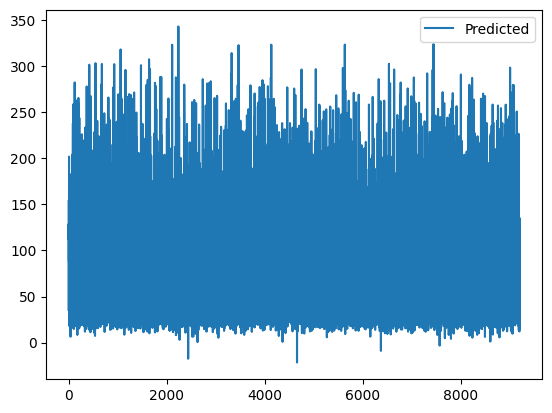

In [53]:
plt.plot(y_pred_unscaled, label='Predicted')
plt.legend()
plt.show()

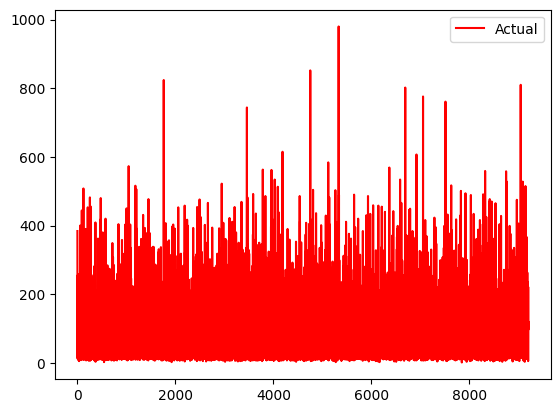

In [59]:
plt.plot(y_unscaled, label='Actual',color='red')
plt.legend()
plt.show()

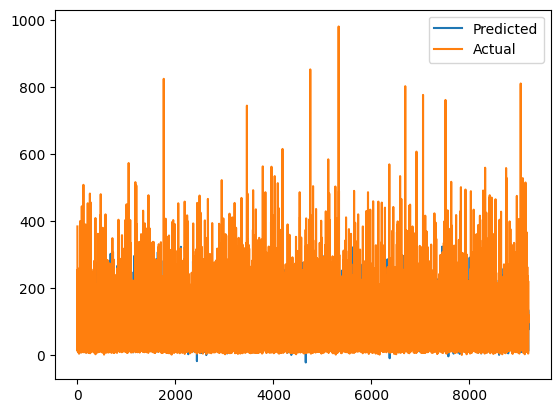

In [52]:
plt.plot(y_pred_unscaled, label='Predicted')
plt.plot(y_unscaled, label='Actual')
plt.legend()
plt.show()

In [60]:
test_data = test.drop('No', axis=1)
test_data_scaled = scaler.fit_transform(test_data)
test_data_df = pd.DataFrame(test_data_scaled,columns=test_data.columns, index=test_data.index)
test_data_df

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
datetime,,,,,,,,,
2013-07-02 04:00:00,1.110314,0.585350,-2.202744,0.070661,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
2013-07-02 05:00:00,1.041740,0.498845,-2.202744,0.108255,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
2013-07-02 06:00:00,1.110314,0.671855,-2.202744,0.173992,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
2013-07-02 07:00:00,1.110314,0.844866,-2.103169,0.258421,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
2013-07-02 08:00:00,1.110314,1.104381,-2.003594,0.296015,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-1.769759,-1.404267,1.780241,4.445001,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
2014-12-31 20:00:00,-1.701186,-1.490772,1.780241,4.567024,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
2014-12-31 21:00:00,-1.701186,-1.490772,1.780241,4.670355,-0.039253,-0.133945,1.508758,-0.721598,-0.559078


In [61]:
target_scaler = StandardScaler()


411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[24.85582 ]
 [25.342743]
 [19.162994]
 [17.007294]
 [16.571663]
 [24.272408]
 [34.54518 ]
 [37.879803]
 [41.00605 ]
 [40.188587]]


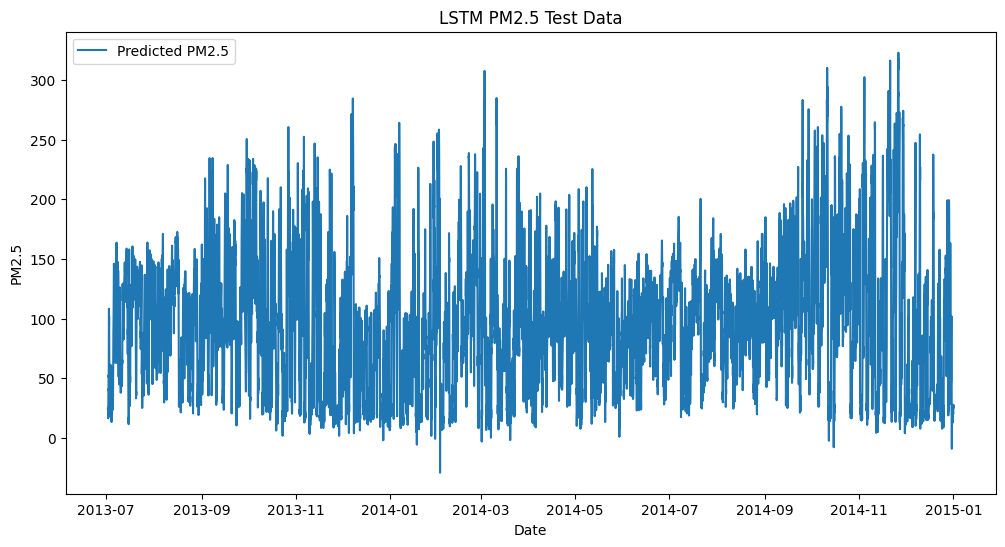

In [63]:
X_test_sequences, y_test_dummy = create_sequences(test_data_df, test_data_df, window_size)

test_predictions_scaled = models.predict(X_test_sequences)

target_scaler.fit(train['pm2.5'].values.reshape(-1, 1))

test_predictions_unscaled = target_scaler.inverse_transform(test_predictions_scaled)

print(test_predictions_unscaled[:10])

plt.figure(figsize=(12, 6))
plt.plot(test_data_df.index[window_size:], test_predictions_unscaled, label='Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('LSTM PM2.5 Test Data')
plt.legend()
plt.show()

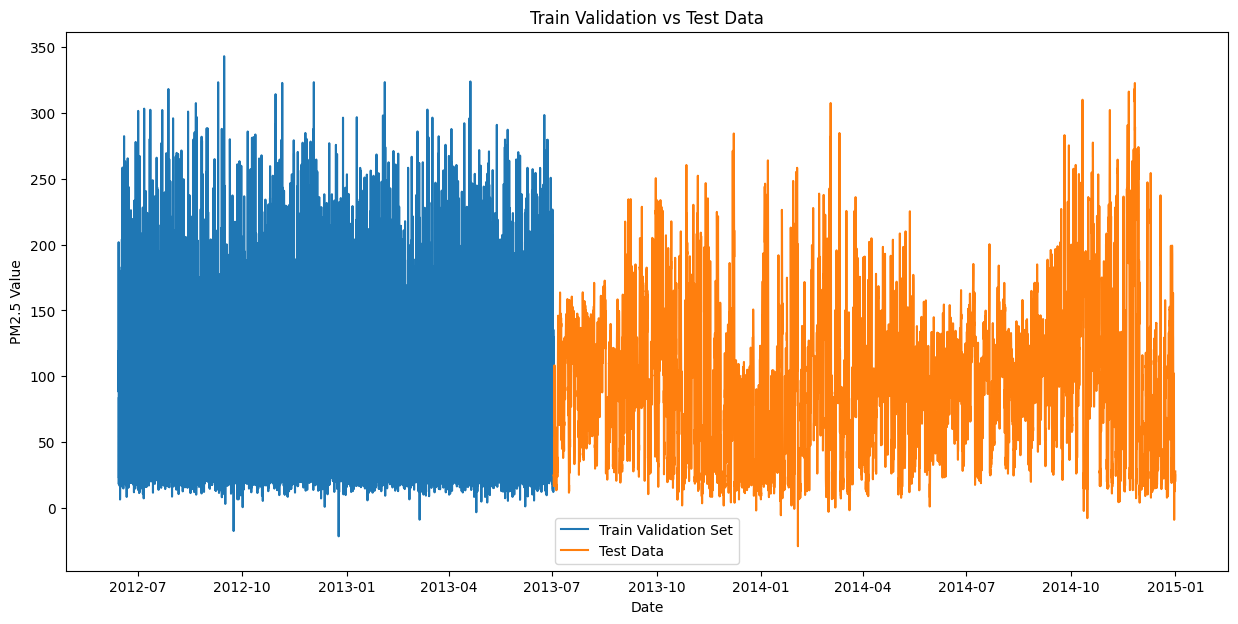

In [65]:

y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))

train_preds_to_plot = y_pred_unscaled[window_size:]
test_preds_to_plot = test_predictions_unscaled

plt.figure(figsize=(15, 7))


plt.plot(train.index[len(train) - len(y_test_unscaled) + window_size:], train_preds_to_plot, label='Train Validation Set')

plt.plot(test_data_df.index[window_size:], test_preds_to_plot, label='Test Data')

plt.xlabel('Date')
plt.ylabel('PM2.5 Value')
plt.title('Train Validation vs Test Data')
plt.legend()
plt.show()

In [66]:
predictions_df = pd.DataFrame(test_predictions_unscaled, index=test.index[window_size:], columns=['predicted_pm2.5'])
display(predictions_df.head())
predictions_df.to_csv('#TimeSeries1.csv')

,predicted_pm2.5
datetime,
2013-07-02 09:00:00,24.855820
2013-07-02 10:00:00,25.342743
2013-07-02 11:00:00,19.162994
2013-07-02 12:00:00,17.007294
2013-07-02 13:00:00,16.571663
